<a href="https://colab.research.google.com/github/srikacharla/CSC8980/blob/main/Exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sri Harsha Kacharla

Student ID: 002556509

Question 1) (20 points) Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’,
‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five
most similar words. For this task you have to use the most suitable method of the ones we have
seen in class to determine the most similar words to the original input list. You can use a
pre-trained resource if you think is appropriate. After calling your function, print the most similar
words to the screen. Are these ‘similar’ words actually similar? If not, why not? What do you
think can be improved and how - talk about it, do not necessarily implement it?


In [1]:
%matplotlib inline
!pip install numpy==1.16.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [ ]:
!gunzip /content/GoogleNews-vectors-negative300.bin.gz

gzip: /content/GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [ ]:
from gensim.models import KeyedVectors
filename = '/content/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
def getSimilarWords(words):
    similarWordsList = []
    for word in words:
      temp = []
      for x in model.most_similar(word,topn=5):
        temp.append(x[0])
      similarWordsList.append(temp)
    return similarWordsList
print(getSimilarWords( ["apple", "house", "pear", "dog", "doctor"]))

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[['apples', 'pear', 'fruit', 'berry', 'pears'], ['houses', 'bungalow', 'apartment', 'bedroom', 'townhouse'], ['pears', 'apricot', 'apricots', 'nectarine', 'Fuji_apple'], ['dogs', 'puppy', 'pit_bull', 'pooch', 'cat'], ['physician', 'doctors', 'gynecologist', 'surgeon', 'dentist']]


The top similar words are actually similar to the input. As we can see, for apple, the most similar words are all fruits and similarly for dog, the most similar words are all different breeds of dogs except for cat which is somewhat similar to dog in terms of it being an animal. 

Question 2) (30 points) Using the Homework 2 dataset, also attached in the Exam 2 files,
shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity
using:

a) Cosine similarity. And create a 42 x 42 heatmap of these similarities.

b) Use Doc2Vec to create document embeddings and find the similarities between the
documents. To visualize this, also create a 42 x 42 heatmap for this.

c) What are the differences you find between the two methods? Is there anything radically
different? Please describe your answer in terms of the heatmap of part a and part b.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import os
import numpy as np
import seaborn as sns


In [ ]:
txt_files = os.listdir('Shakespeare')
data = []
for file in txt_files:
   data.append(open(os.path.join('Shakespeare',file), 'r').read())

In [ ]:
tfidf = TfidfVectorizer().fit_transform(data)

In [ ]:
cosineMatrix = cosine_similarity(tfidf, tfidf)
print(cosineMatrix)

[[1.         0.63697724 0.64658364 ... 0.5813789  0.71434363 0.6516925 ]
 [0.63697724 1.         0.57720725 ... 0.52960594 0.63758012 0.59404353]
 [0.64658364 0.57720725 1.         ... 0.52402205 0.63647284 0.62291609]
 ...
 [0.5813789  0.52960594 0.52402205 ... 1.         0.58721693 0.54957088]
 [0.71434363 0.63758012 0.63647284 ... 0.58721693 1.         0.65650022]
 [0.6516925  0.59404353 0.62291609 ... 0.54957088 0.65650022 1.        ]]


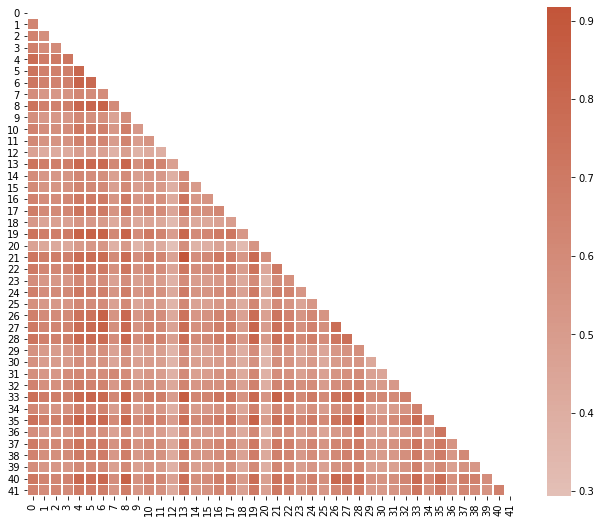

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cosineMatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cosineMatrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [ ]:
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
import os
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
docLabels = []
docLabels = [f for f in os.listdir("Shakespeare") if f.endswith('.txt')]

In [ ]:
s1 = 'the quick fox brown fox jumps over the lazy dog'
s1_tag = '001'
s2 = 'i want to burn a zero-day'
s2_tag = '002'

docs1 = []
count =0 
for sent in data:
  docs1.append(TaggedDocument(words = [sent],tags=[txt_files[count]]))
  count+=1
print(docs1[0])

TaggedDocument(['The Winter\'s Tale\nby William Shakespeare\nEdited by Barbara A. Mowat and Paul Werstine\n  with Michael Poston and Rebecca Niles\nFolger Shakespeare Library\nhttps://shakespeare.folger.edu/shakespeares-works/the-winters-tale/\nCreated on Apr 12, 2016, from FDT version 0.9.2.2\n\nCharacters in the Play\n======================\nLEONTES, King of Sicilia\nHERMIONE, Queen of Sicilia\nMAMILLIUS, their son\nPERDITA, their daughter\nPOLIXENES, King of Bohemia\nFLORIZELL, his son\nCAMILLO, a courtier, friend to Leontes and then to Polixenes\nANTIGONUS, a Sicilian courtier\nPAULINA, his wife and lady-in-waiting to Hermione\nCourtiers in Sicilia:\n  CLEOMENES\n  DION\nEMILIA, a lady-in-waiting to Hermione\nSHEPHERD, foster father to Perdita\nSHEPHERD\'S SON\nAUTOLYCUS, former servant to Florizell, now a rogue\nARCHIDAMUS, a Bohemian courtier\nTIME, as Chorus\nTWO LADIES attending on Hermione\nLORDS, SERVANTS, and GENTLEMEN attending on Leontes\nAn OFFICER of the court\nA MARINER

In [ ]:
model = Doc2Vec(workers=11,min_count=0,alpha=0.025, min_alpha=0.025)
model.build_vocab(docs1)
for epoch in range(10):
    model.train(docs1,total_examples=model.corpus_count,epochs=model.epochs)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca
    # model.train(it,total_examples=model.corpus_count,epochs=model.epochs)

In [ ]:
matrix = []
count =0
for file in data:
  matrix.append([])
  for file1 in data:
    matrix[count].append(model.similarity(file,file1))
  count+=1
# print(matrix)
matrix = np.array(matrix)
print(matrix)

[[ 1.          0.13971336 -0.02564395 ... -0.19443597 -0.10592423
   0.06491781]
 [ 0.13971336  1.         -0.02953283 ... -0.2197015  -0.13034628
  -0.01084002]
 [-0.02564395 -0.02953283  0.99999994 ...  0.1295121  -0.11593577
   0.09455122]
 ...
 [-0.19443597 -0.2197015   0.1295121  ...  0.99999994  0.1296629
   0.07069014]
 [-0.10592423 -0.13034628 -0.11593577 ...  0.1296629   0.99999994
   0.11904126]
 [ 0.06491781 -0.01084002  0.09455122 ...  0.07069014  0.11904126
   1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


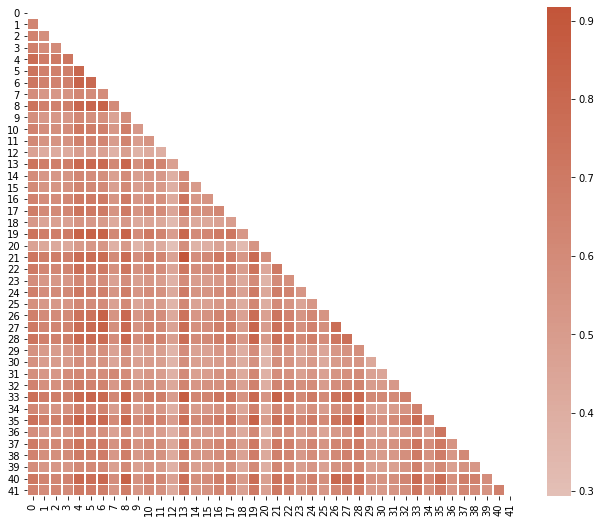

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cosineMatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cosineMatrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

Looking at the heatmap of two methods, it doesnt look like there is a radical difference between the two. Upon closer inspection of each cell, they are both almost identical to each other.

Question 3) (30 points) Using the Homework 2 dataset. Use SpaCy to extract the following:

a) Write a function to generate all unique bigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of bigrams and their frequency. Display the top 10 most common bigrams and their
frequency.

b) Write a function to generate all unique trigrams from all documents in the dataset. The
input of this function should be the concatenated dataset and the output should be the
list of trigrams and their frequency. Display the top 10 most common trigrams and their
frequency.

c) Write a function to extract all unique NOUN and VERB tokens. The input of this function
should be the concatenated dataset and the output should be two lists: one of the NOUN
tokens and their frequency, the other list should be the VERB tokens and their counts.
Display the top 10 most common NOUN and VERB tokens.

d) What do you think the most common bigrams and trigrams could be useful for? There is
a particular method we have seen in this class to characterize a corpus that could benefit
from having these bigrams/trigrams when the underlying text corpus can’t be shared.
Please talk about this.

In [ ]:
from nltk import bigrams, trigrams
from collections import defaultdict

In [ ]:
def generateBigrams(data):
  text = data
  tokens = nltk.word_tokenize(text)
  bigrm = nltk.bigrams(tokens)
  # print(list(bigrm))
  fdist = nltk.FreqDist(bigrm)
  freq = []
  for k,v in fdist.items():
      freq.append([k,v])
  return freq

In [ ]:
allData = ""
for x in data:
  allData+=x
freqBi = generateBigrams(allData)


In [ ]:
def myFunc(e):
  return e[1]
# freq[0][1]
freqBi.sort(key=myFunc, reverse=True)
print(freqBi[:10])

[[(',', 'and'), 7555], [('.', ']'), 6766], [('.', '['), 4857], [(',', 'I'), 4460], [(',', 'And'), 3742], [('.', 'I'), 3132], [(',', '['), 2773], [(',', 'my'), 2251], [('[', 'Enter'), 2177], [('I', 'am'), 1962]]


In [ ]:
def generateTrigrams(data):
  text = data
  tokens = nltk.word_tokenize(text)
  bigrm = nltk.trigrams(tokens)
  # print(list(bigrm))
  fdist = nltk.FreqDist(bigrm)
  freq = []
  for k,v in fdist.items():
      freq.append([k,v])
  return freq

In [ ]:
freqTri = generateTrigrams(allData)
freqTri.sort(key=myFunc, reverse=True)
print(freqTri[:10])

[[('.', '[', 'Enter'), 994], [(',', 'sir', ','), 991], [('exits', '.', ']'), 986], [('exit', '.', ']'), 970], [(',', 'my', 'lord'), 957], [('.', '[', 'He'), 918], [(',', '[', 'to'), 876], [(',', '[', 'as'), 717], [('.', '[', 'They'), 698], [('=======', '[', 'Enter'), 630]]


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp.max_length = len(allData)

Nouns = []
Verbs = []

In [ ]:
def getNounAndVerbCount(alldata):
  Nouns = {}
  Verbs = {}
  doc1 = nlp(allData,disable = ['ner', 'parser'])
  for token in doc1:
    # print(Nouns)
    if token.pos_ == 'NOUN':
      if token.string in Nouns:
        Nouns[token.string]+=1
        # print(token)
      else:
        Nouns[token.string] = 1

    if token.pos_ == 'VERB':
      # print(Verbs.keys())
      if token.string in Verbs.keys():
        Verbs[token.string]+=1
        # print(token)
      else:
        Verbs[token.string] = 1

  sorted_dict_Noun = {}
  sorted_keys_Noun = sorted(Nouns, key=Nouns.get,reverse=True) 

  for w in sorted_keys_Noun:
      sorted_dict_Noun[w] = Nouns[w]


  sorted_dict_Verb = {}
  sorted_keys_Verb = sorted(Verbs, key=Verbs.get,reverse=True) 
  sortedNounsList = []
  sortedVerbsList = []
  for w1 in sorted_keys_Verb:
      sorted_dict_Verb[w1] = Verbs[w1]
  for key, value in sorted_dict_Noun.items():
    sortedNounsList.append([key,value])
  for key, value in sorted_dict_Verb.items():
    sortedVerbsList.append([key,value])
  
  return sortedNounsList,sortedVerbsList

In [ ]:
sortedNounsList,sortedVerbsList = getNounAndVerbCount(allData)

print(sortedNounsList)
print(sortedVerbsList)

[['sir', 1350], ['man', 1045], ['man ', 956], ['love', 876], ['lord', 821], ['Scene ', 771], ['love ', 699], ['father', 638], ['doth ', 634], ['heart', 624], ['hand', 616], ['hath ', 606], ['time ', 601], ['death', 585], ['KING ', 583], ['life', 565], ['men ', 493], ['t ', 489], ['night', 489], ['time', 479], ['men', 477], ['heart ', 475], ['day', 453], ['exit', 440], ['eyes', 419], ['lady', 413], ['exits', 411], ['world', 406], ['king', 405], ['son', 404], ['father ', 391], ['blood', 386], ['mine ', 373], ['life ', 368], ['eyes ', 364], ['brother', 362], ['day ', 354], ['wife', 347], ['t', 343], ['name', 341], ['head', 336], ['art ', 333], ['master', 327], ['friends', 318], ['way ', 317], ['world ', 315], ['hand ', 310], ['friend', 306], ['blood ', 306], ['name ', 299], ['death ', 292], ['way', 290], ['honor ', 289], ['daughter', 287], ['soul', 287], ['none ', 280], ['lords', 274], ['th', 273], ['word', 273], ['woman', 272], ['mother', 271], ['face', 269], ['honor', 268], ['house', 26

The most common bigrams and trigrams can be used to determine the polarity of the underlying text when the corpora is not given. For example, if we see bigrams like dont, like or doesnt want etc., we can make an assumption about the underlying text if its positive or negative. 

Question 4) (30 points) Using the dataset: Ask0729, found in Exam files, write two functions to
extract all dates found in this dataset. The input of these functions should take the dataset as
input, and output a list of dates. You should use two different methods, one per function.

a) First method: using SpaCy (this is a big enough hint)

b) Second method: using regular expressions.

c) Print to screen to compare the results from the two functions.

d) Which one of the two approaches was better? Why do you think so? Would you use any
of these approaches? Or a different one?

In [ ]:
askData = ""
askData = open("Ask0729-fixed.txt", 'r').read()


In [ ]:
def getDates(askData):
  nlpDoc = nlp(askData,disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"])
  print(nlpDoc.ents)
  for ent in nlpDoc.ents:
    if ent.label_ == 'DATE':
      print("{} -> {}".format(ent.text,ent.label_))

In [ ]:
getDates(askData)

(100, between $500 and $10000 dollars, up to 5 years, today, 10, today, LINK, public:*ï¿½, first, this 125 seconds, Adobe Acrobat Reader, Memorial Day, 20, Lay, today, one week, America, 519, Somerville Avenue, 323, Somerville, MA 02143, daily, early in the morning, late at night, 30, 3 Night, LINK, today, LINK, 3+ Nights & Save, 30, this week, a few minutes, weekend, this week, notifications@socialreader-email.com, GSNnews@email.gsn.com, 2 Weeks, How many hours, LINK, Lessig, LINK, TIDY ME', LINK, Rhapsody.com, LINK, 3, 6, AppShopper, LINK, one, first, 150, the year, Archangel Michael, 0 Comments $LINK, more than one, LINK, Jane-nee, Chickengirl, tonight, tomorrow, PaperKarma, Tozzini, Jose, SP, 1st, 3rd, Wednesday, 130, Omni Sync Server, Horizon Card Services, thousands, Horizon Gold Card, Bay City, Saturday, overnight, 9, the 6 year old, Legal, tomorrow, the Blue Agave, 25 years, Belfast, NickyEven, Bible, Bibles, Bible, Tasks, Brent, 52, year end 2000, over 40, under 40/over 40, Mo

In [ ]:
# Should do with Regex too
import re

def getDatesRegex(askData):
  regEx = r'(?:\d{1,2}[-/th|st|nd|rd\s]*)?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)?[a-z\s,.]*(?:\d{1,2}[-/th|st|nd|rd)\s,]*)+(?:\d{2,4})+'
  matches = re.findall(regEx, askData)
  return matches


In [ ]:
for dates in getDatesRegex(askData):
  print(dates)

100
500
10000
ind out how to add clippings to your pressroom in this 125
148
2788
186
186
merica at... 519
uite 323
 02143
t one of the first 150
ednesday at 130
52 by year end 2000
July 31, 2014
30 June 2012
365
100
ord told me that my 300
 365
9/11
July 4, 2012
March 20, 2001 02
nsurance a call at 800-493-9489
ow would you spend this 100
276) 243-1628
276) 690-7548
832) 301-8746
n the old days, you could only flow 7/12
June 23, 2000
o	30-45
 meeting has been scheduled on 3/16
presentaiton of the 1999
 and 2000
s 2081
 900
March 8, 2013
23 and starting with the next bill we are supposed to get 120
msterdam 1850-1940
February 28, 2014
ernley and his business controllers to get their ideas on specific goals that as a group we would commit to for 2000
11 July, 56,000
April 2011 02
st due date 12/18/11 03
st due date 12/18/11 04
st due date 12/18/11 05
st due date 12/18/11 18
ay 1 19
ay 2 20
ay 3 21
ay 4 22
ay 5 23
ay 6 24
April 5-19 15,000
 .055
ear 2001
August 2013
August 22, 2012
Augus

Comparing the results of the two methods quickly gives us an idea that spacy is far superior. It gave us more accurate answers than the regex. Although given enough time one can create a regex which can more accurately weed out the dates but it is very costly to do so. 

The approach with spacy was better as it gave us better more accurate results. spacy was able to give more accurate results because it is based on machine learning and has been trained on a huge amount of data but regex is limited to the imagination of the programmer. I would use the spacy approach as it doesnt involve me training the model with huge labelled data as it already comes heavily trained.

Question 5) (30 points) Train an LSTM model to classify the Cornell Movie Review data
using the polarity_dataset V2.0. You can use the code for class 19, but take a note that
you will have to adapt some of the parameters like: Review size = 450, epochs=5. You will use
85% of the dataset for training, and 15% for testing. Once you build the model, please display
the sklearn classification report. What are you noticing here? Anything unexpected? How does
this model compare to the one built with the IMDB dataset in class? Any ideas on how to
improve it?


In [ ]:
!tar -xvf review_polarity.tar.gz 

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv014_15600.txt
txt_sentoken/neg/cv015_29356.txt
txt_sentoken/neg/cv016_4348.txt
txt_sentoken/neg/cv017_23487.txt
txt_sentoken/neg/cv018_21672.txt
txt_sentoken/neg/cv019_16117.txt
txt_sentoken/neg/cv020_9234.txt
txt_sentoken/neg/cv021_17313.txt
txt_sentoken/neg/cv022_14227.txt
txt_sentoken/neg/cv023_13847.txt
txt_sentoken/neg/cv024_7033.txt
txt_sentoken/neg/cv025_29825.txt
txt_sentoken/neg/cv026_29229.txt
txt_sentoken/neg/cv027_26270.txt
txt_sentoken/neg/cv028_26964.txt
txt_sentoken/neg/cv029_19943.txt
txt_sentoken/n

In [105]:
from sklearn.model_selection import train_test_split

txt_files = os.listdir('/content/txt_sentoken/neg')
data = []
target = []
for file in txt_files:
   data.append(open(os.path.join('/content/txt_sentoken/neg',file), 'r',encoding="utf8").read())
   target.append(0)
txt_files = os.listdir('/content/txt_sentoken/pos')
for file in txt_files:
   data.append(open(os.path.join('/content/txt_sentoken/pos',file), 'r',encoding="utf8").read())
   target.append(1)
data = np.array(data)
target = np.array(target)
np.random.seed(2361)

x_train, x_test, y_train, y_test = train_test_split(data, target,train_size=0.85)

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=280)
tokenizer.fit_on_texts(data) 
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [ ]:

import tensorflow as tf 
from tensorflow.keras.preprocessing import sequence
from numpy import array
from sklearn.metrics import classification_report


review_length = 500
vocab_size = 10000
x1_train = sequence.pad_sequences(sequences_train, maxlen = review_length)
x1_test = sequence.pad_sequences(sequences_test, maxlen = review_length)
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, 
        output_dim = 32, 
        input_length = review_length 
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)
model.add(
    tf.keras.layers.LSTM(
        units=32 
    )
)
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 
    )
)
model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)
model.compile(
    loss=tf.keras.losses.binary_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']) 
model.summary()
# y_train1 = y_train
# y_test1 = y_test
# y_train1 = y_train1.replace(4,1)
# y_test1 = y_test1.replace(4,1)
history = model.fit(x1_train, y_train,batch_size=256,epochs=10,validation_split=0.2,verbose=1)

predicted_classes = model.predict_classes(x1_test)
classification_report = classification_report(y_test, predicted_classes)
print(classification_report)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6/6 [==============================] - 7s 658ms/step - loss: 0.6935 - accuracy: 0.4828 - val_loss: 0.6927

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.55      0.94      0.70       148
           1       0.82      0.26      0.40       152

    accuracy                           0.60       300
   macro avg       0.69      0.60      0.55       300
weighted avg       0.69      0.60      0.55       300



For 10 epochs the accuracy actually peaked at 0.73 and it came down to 0.66 which is strange. It also performs worse than the IMDB model discussed in the class. The IMDB model is also a more balanced model as the precision, recall and f1 scores are close to each other. While in this model, the recall score is all over the place. This model performs poorer because the size of the training data is less compared to the IMDB model. 

Question 6) (30 points) Use the train.txt file from the PubMed 20K RCT dataset fine-tune a
BERT transformer (class 9 code). This task is a bit different as the one seen in class, here the
source dataset has FIVE different classes: background, objective, method, result, and
conclusion. Once the BERT model is fine-tuned, classify the: test.txt set. Please present the
per-class classification report (accuracy, precision, recall, f1-score metrics). Also, present the
global metrics - all classes (accuracy, precision, recall, f1-score metrics). Did you model beat the
baseline results (https://arxiv.org/pdf/1710.06071.pdf)? What do you think you can do to improve
it?

In [60]:
import tensorflow as tf

import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [61]:
!pip install transformers

     |████████████████████████████████| 15.3MB 277kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2


In [134]:
pubMedDataDev = []
pubMedDataDev.append(open('/content/PubMed/dev.txt', 'r'))
sentencesDev = []
labelsDev = []
for line in pubMedDataDev[0]:
  if not line.startswith('###') and not line.startswith('\n'):
    # print(line)
    split1 = line.split('\t')
    # print(split1)
    if split1[0]=='BACKGROUND':
      labelsDev.append(1)
    elif split1[0]=='OBJECTIVE':
      labelsDev.append(2)
    elif split1[0]=='METHODS':
      labelsDev.append(3)
    elif split1[0]=='RESULTS':
      labelsDev.append(4)
    elif split1[0]=='CONCLUSIONS':
      labelsDev.append(5) 
    sentencesDev.append(split1[1])
print(len(labelsDev))
print(len(sentencesDev))

30212
30212


In [135]:
pubMedDataTrain = []
pubMedDataTrain.append(open('/content/PubMed/train.txt', 'r'))
sentencesTrain = []
labelsTrain = []
for line in pubMedDataTrain[0]:
  if not line.startswith('###') and not line.startswith('\n'):
    # print(line)
    split1 = line.split('\t')
    # print(split1)
    if split1[0]=='BACKGROUND':
      labelsTrain.append(1)
    elif split1[0]=='OBJECTIVE':
      labelsTrain.append(2)
    elif split1[0]=='METHODS':
      labelsTrain.append(3)
    elif split1[0]=='RESULTS':
      labelsTrain.append(4)
    elif split1[0]=='CONCLUSIONS':
      labelsTrain.append(5) 
    sentencesTrain.append(split1[1])
print(len(labelsTrain))
print(len(sentencesTrain))

180040
180040


In [136]:
pubMedDataTest = []
pubMedDataTest.append(open('/content/PubMed/test.txt', 'r'))
sentencesTest = []
labelsTest = []
for line in pubMedDataTest[0]:
  if not line.startswith('###') and not line.startswith('\n'):
    # print(line)
    split1 = line.split('\t')
    # print(split1)
    if split1[0]=='BACKGROUND':
      labelsTest.append(1)
    elif split1[0]=='OBJECTIVE':
      labelsTest.append(2)
    elif split1[0]=='METHODS':
      labelsTest.append(3)
    elif split1[0]=='RESULTS':
      labelsTest.append(4)
    elif split1[0]=='CONCLUSIONS':
      labelsTest.append(5) 
    sentencesTest.append(split1[1])
print(len(labelsTest))
print(len(sentencesTest))

30135
30135


In [140]:
from transformers import BertTokenizer

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [141]:
input_idsTrain = []
attention_masksTrain = []

# For every sentence...
for sent in sentencesTrain:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100, 
                        truncation=True,          # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_idsTrain.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masksTrain.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_idsTrain = torch.cat(input_idsTrain, dim=0)
attention_masksTrain = torch.cat(attention_masksTrain, dim=0)
labelsTrain = torch.tensor(labelsTrain)
labelsTrain = labelsTrain - 1

# Print sentence 0, now as a list of IDs.
print('Original: ', sentencesTrain[0])
print('Token IDs:', input_idsTrain[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .

Token IDs: tensor([  101,  2000,  8556,  1996, 21150,  1997,  1020,  3134,  1997,  3679,
         2659,  1011, 13004,  8700,  3653,  2094,  8977, 12898,  2638,  1999,
         9229,  3255,  1010, 12969,  1010,  1998, 22575,  2659,  1011,  3694,
        21733,  1999,  1996,  2460,  2744,  1998,  3251,  1996,  3466,  2052,
         2022,  8760,  2012,  2260,  3134,  1999,  3080,  6001,  2007,  8777,
         2000,  5729,  6181,  9808,  2618, 10441, 15265, 14778,  2483,  1006,
         1051,  2050,  1007,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,

In [142]:
input_idsTest = []
attention_masksTest = []

# For every sentence...
for sent in sentencesTest:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,  
                        truncation=True,         # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_idsTest.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masksTest.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_idsTest = torch.cat(input_idsTest, dim=0)
attention_masksTest = torch.cat(attention_masksTest, dim=0)
labelsTest = torch.tensor(labelsTest)
labelsTest = labelsTest -1
# Print sentence 0, now as a list of IDs.
print('Original: ', sentencesTest[0])
print('Token IDs:', input_idsTest[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  This study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .

Token IDs: tensor([  101,  2023,  2817, 16578, 11290,  3853, 28828,  1999,  2540,  4945,
         5022,  4914,  2007,  5729, 11325, 21933,  8737,  6132,  4383,  2540,
         4945,  1006,  4748,  2232,  2546,  1007,  1012,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [143]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
datasetTrain = TensorDataset(input_idsTrain, attention_masksTrain, labelsTrain)
datasetTest = TensorDataset(input_idsTest,attention_masksTest,labelsTest)

train_size = int(0.9 * len(datasetTrain))
val_size = len(datasetTest) - train_size

train_dataset = datasetTrain
val_dataset = datasetTest

In [144]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16
# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [145]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
# model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [146]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [147]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [148]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [150]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [151]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.



    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

KeyboardInterrupt: ignored